In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import log_loss
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier


In [46]:
def plot_confusion_matrix(y_true, y_pred, labels=["Negative", "Positive"], show_precision=True, show_recall=True):

  cm = confusion_matrix(y_true, y_pred) # tn, fp, fn, tp

  df_cm = pd.DataFrame(cm, index = labels,
                    columns = ["Predicted "+labels[0],"Predicted "+labels[1]])
  sns.heatmap(df_cm, annot=True)


In [4]:
df = pd.read_csv('/content/insurance_cross_selll.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


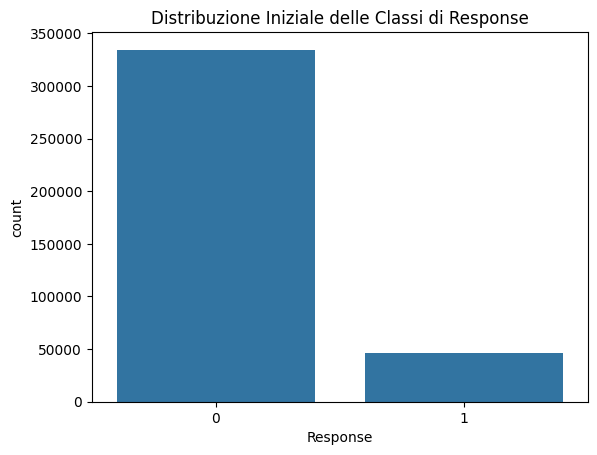

In [6]:
sns.countplot(x = 'Response', data = df)
plt.title('Distribuzione Iniziale delle Classi di Response')
plt.show()

In [12]:
X = df.drop('Response', axis = 1)
y = df['Response']

X_train, X_trest, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0 )
train_data = pd.concat([X_train, y_train], axis = 1)
class_0 = train_data[train_data['Response'] == 0]
class_1 = train_data[train_data['Response'] == 1]

class_1_upsampled = resample(class_1, replace = True, n_samples = len(class_0), random_state = 0)
upsampled_data = pd.concat([class_0, class_1_upsampled])

X_resampled = upsampled_data.drop('Response', axis = 1)
y_resampled = upsampled_data['Response']
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state = 0 )

X.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,1,0.369231,1,28.0,0,2,1,0.070366,26.0,0.716263
1,2,1,0.861538,1,3.0,0,0,0,0.057496,26.0,0.598616
2,3,1,0.415385,1,28.0,0,2,1,0.066347,26.0,0.058824
3,4,1,0.015385,1,11.0,1,1,0,0.048348,152.0,0.667820
4,5,0,0.138462,1,41.0,1,1,0,0.046259,152.0,0.100346


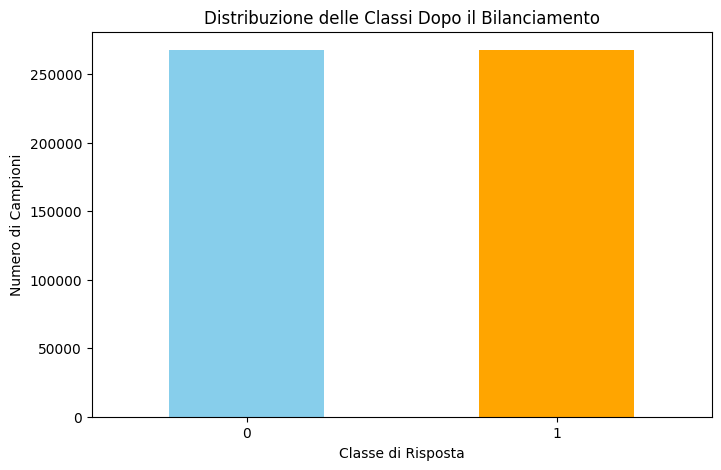

In [8]:
class_counts = y_resampled.value_counts()


plt.figure(figsize=(8, 5))
class_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribuzione delle Classi Dopo il Bilanciamento')
plt.xlabel('Classe di Risposta')
plt.ylabel('Numero di Campioni')
plt.xticks(rotation=0)
plt.show()

In [9]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [10]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Vehicle_Damage'] = le.fit_transform(df['Vehicle_Damage'])
df['Vehicle_Age'] = le.fit_transform(df['Vehicle_Age'])

X.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39


In [11]:
quantitative_col = ['Age', 'Annual_Premium', 'Vintage']
quan_df = df[quantitative_col]
scaler = StandardScaler()
scalernorm = MinMaxScaler()
df[quantitative_col] = scaler.fit_transform(quan_df)
df[quantitative_col] = scalernorm.fit_transform(quan_df)

df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,0.369231,1,28.0,0,2,1,0.070366,26.0,0.716263,1
1,2,1,0.861538,1,3.0,0,0,0,0.057496,26.0,0.598616,0
2,3,1,0.415385,1,28.0,0,2,1,0.066347,26.0,0.058824,1
3,4,1,0.015385,1,11.0,1,1,0,0.048348,152.0,0.667820,0
4,5,0,0.138462,1,41.0,1,1,0,0.046259,152.0,0.100346,0


<Axes: >

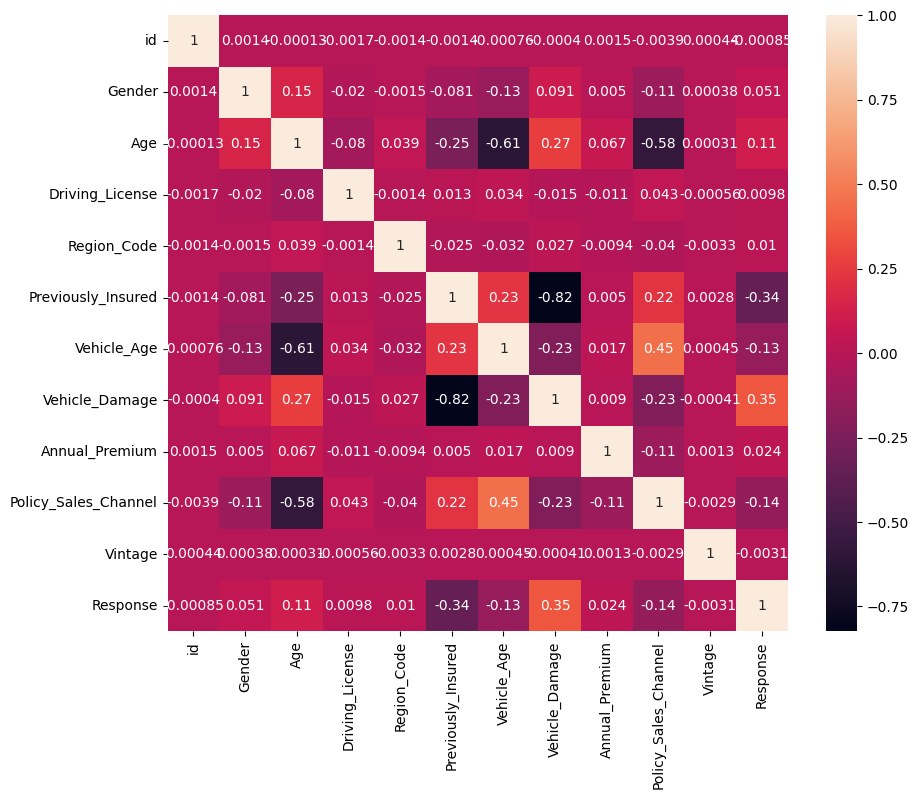

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True, annot_kws = {'size': 10})

**MODELLO: DECISION TREE CLASSIFIER**


In [30]:
?DecisionTreeClassifier

In [ ]:
model_DTC = DecisionTreeClassifier()
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(1, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

random_search = RandomizedSearchCV(estimator=model_DTC, param_distributions=param_dist, cv=5, n_iter = 50, verbose = 1, n_jobs = -1, scoring='accuracy')

random_search.fit(X_train, y_train)


print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 42, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 7}
Best Score: 0.8920720582578507


In [35]:
model_DTC= DecisionTreeClassifier(
                                  criterion='gini',
                                  max_depth=45,
                                  min_samples_split=7,
                                  min_samples_leaf=1,
                                  max_features='sqrt',
                                  random_state=0,
                                  class_weight = 'balanced')

model_DTC.fit(X_train, y_train)
predictions_DTC = model_DTC.predict(X_test)


accuracy = accuracy_score(y_test, predictions_DTC)
print("Accuracy:", accuracy)
report = classification_report(y_test, predictions_DTC)
print("Classification Report:\n", report)

Accuracy: 0.9138427229462038
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.86      0.91     80362
           1       0.88      0.96      0.92     80170

    accuracy                           0.91    160532
   macro avg       0.92      0.91      0.91    160532
weighted avg       0.92      0.91      0.91    160532



In [57]:
conf_matrix_DTC = confusion_matrix(y_test, predictions_DTC)
print("Matrice di Confusione:")
print(conf_matrix_DTC)

Matrice di Confusione:
[[69299 11063]
 [ 2780 77390]]


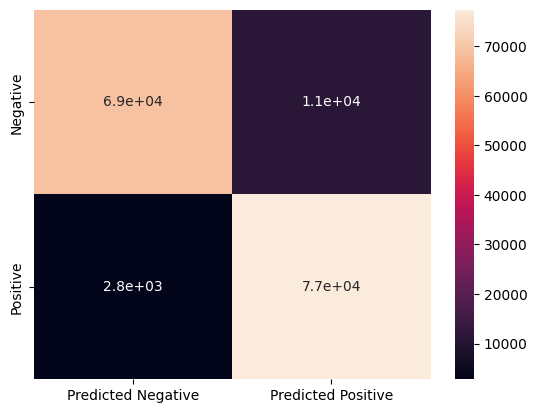

In [56]:
plot_confusion_matrix(y_test, predictions_DTC)
plt.show()

In [36]:
log_loss(y_test, predictions_DTC)

3.105423031077164

In [37]:
train_accuracy = model_DTC.score(X_train, y_train)
test_accuracy = model_DTC.score(X_test, y_test)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.9817312466962469
Test Accuracy: 0.9138427229462038


In [ ]:
importances = model_DTC.feature_importances_

for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance}")

id: 0.13738684416592345
Gender: 0.010709682973191874
Age: 0.10371175269913824
Driving_License: 0.0006537839678477493
Region_Code: 0.057394930218138775
Previously_Insured: 0.2545372868440541
Vehicle_Age: 0.006633042390709782
Vehicle_Damage: 0.146385890204806
Annual_Premium: 0.11150278752260495
Policy_Sales_Channel: 0.041473298611328355
Vintage: 0.1296107004022567


**MODELLO: RANDOM FOREST**

In [15]:
?RandomForestClassifier

In [16]:
model_RF = RandomForestClassifier(n_estimators=90,
                                  criterion = 'gini',
                                  max_depth=35,
                                  max_features = 'sqrt',
                                  min_samples_split=2,
                                  min_samples_leaf=1,
                                  class_weight = 'balanced')
model_RF.fit(X_train, y_train)
predictions_RF = model_RF.predict(X_test)
accuracy_model_RF = accuracy_score(y_test, predictions_RF)
report = classification_report(y_test, predictions_RF)
print(f'Accuracy: {accuracy_model_RF}')
print(f'Classification report: {report}')

Accuracy: 0.9277527221986893
Classification report:               precision    recall  f1-score   support

           0       1.00      0.86      0.92     80362
           1       0.88      1.00      0.93     80170

    accuracy                           0.93    160532
   macro avg       0.94      0.93      0.93    160532
weighted avg       0.94      0.93      0.93    160532



In [51]:
conf_matrix_DTC = confusion_matrix(y_test, predictions_RF)
print("Matrice di Confusione:")
print(conf_matrix_DTC)

Matrice di Confusione:
[[68784 11578]
 [  269 79901]]


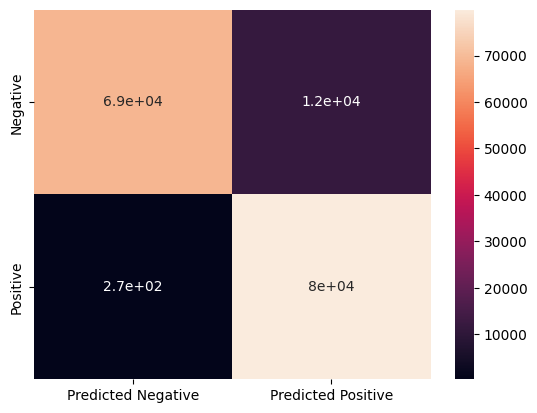

In [50]:
plot_confusion_matrix(y_test, predictions_RF)
plt.show()

In [17]:
log_loss(y_test, predictions_RF)

2.6040558393776982

In [18]:
train_accuracy = model_RF.score(X_train, y_train)
test_accuracy = model_RF.score(X_test, y_test)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.9903597153032512
Test Accuracy: 0.9277527221986893


In [32]:
importances = model_RF.feature_importances_

for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance}")

id: 0.13403689261236745
Gender: 0.008978483900797418
Age: 0.11364250512508904
Driving_License: 0.00058094387203915
Region_Code: 0.06774405163830689
Previously_Insured: 0.16575308599451916
Vehicle_Age: 0.0185860937152252
Vehicle_Damage: 0.19404406273362265
Annual_Premium: 0.10744321964365028
Policy_Sales_Channel: 0.06424915834763899
Vintage: 0.12494150241674369
